<a href="https://colab.research.google.com/github/mohiuhere/nnfll/blob/main/nnfll_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd  

In [3]:
dataset = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

In [4]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [43]:
X = dataset.iloc[ :,[0, 1, 2, 3, 4, 5, 6]].values
y = dataset.iloc[ :, -1].values

In [44]:
X.shape

(2200, 7)

In [24]:
X.shape

(2200, 7)

In [46]:
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [47]:
y.shape

(2200,)

In [48]:
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

In [88]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# Y = ohe.fit_transform(dataset[['label']]).toarray()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label_list = lb.fit_transform(y)

In [89]:
label_list

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
X

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

In [91]:
X.shape

(2200, 7)

In [57]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [92]:
X

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, label_list, test_size = 0.20, random_state=42)

In [94]:
X_train.shape

(1760, 7)

In [95]:
X_test.shape

(440, 7)

In [96]:
Y_train.shape

(1760, 22)

In [97]:
Y_test.shape

(440, 22)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [130]:
# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=7, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(18, activation='relu'))

model.add(Dense(22, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                80        
                                                                 
 dense_33 (Dense)            (None, 14)                154       
                                                                 
 dense_34 (Dense)            (None, 18)                270       
                                                                 
 dense_35 (Dense)            (None, 22)                418       
                                                                 
Total params: 922
Trainable params: 922
Non-trainable params: 0
_________________________________________________________________


In [132]:
history = model.fit(X_train,Y_train,epochs=100, batch_size=32)

Epoch 1/100
55/55 [==============================] - 1s 4ms/step - loss: 0.6522 - accuracy: 0.0403
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4134 - accuracy: 0.0432
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2153 - accuracy: 0.0443
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1935 - accuracy: 0.0602
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1886 - accuracy: 0.0614
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1867 - accuracy: 0.0420
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.0688
Epoch 8/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1841 - accuracy: 0.0801
Epoch 9/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1826 - accuracy: 0.0898
Epoch 10/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1808 - accuracy: 0.1040
Epoch 11/

In [133]:
acc = history.history['accuracy']
loss = history.history['loss']

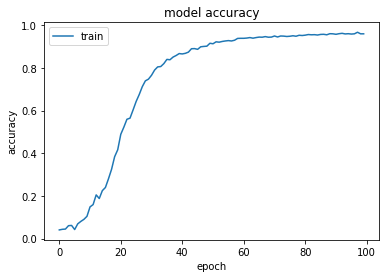

<Figure size 432x288 with 0 Axes>

In [134]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

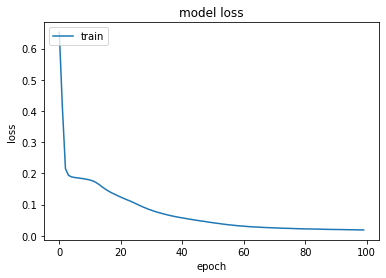

<Figure size 432x288 with 0 Axes>

In [135]:
#plot training loss
plt.plot(history.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [136]:
history_test = model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9364


In [137]:
history_test

[0.02600356750190258, 0.9363636374473572]

Now we have to create and train the K Nearest Neighbor model with the training set. We are using 3 parameters in the model creation. n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point. The distance metric we are using is Minkowski,

Our Model is created, now we have to predict the output for the test set

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

We can evaluate our model using the confusion matrix and accuracy score by comparing the predicted and actual test values

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
print(cm)

[[48  4]
 [ 2 26]]


In [ ]:
print(ac)

0.925
